<a href="https://colab.research.google.com/github/asim5800/azure/blob/main/Lendbox_APP_REVIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

# Top apps for our rivalry

1 12 club (com.twelve.club)

2 Lendenclub investment (com.innofinsolutions.lendenclub.lender)

3 Lendenclub borrower (com.innofinsolutions.instamoney)

4 Faircent (com.app.faircent)

5 Lendbox (in.lendbox.app)

6 Rupeecircle(com.fintelligence.rupeecircle)

7 i2i funding (com.i2ifunding_investorapp)

8 i2i borrower (com.i2iborrower)
 

In [ ]:
# Define and configure Google Play Scraper library
phonepe_users_reviews = reviews_all(
    'in.lendbox.app',
    sleep_milliseconds=0,
    #lang='chi', # Default language is 'en', set language to Chinese.
    #country='hk', # Default country is 'us', set country to Hong Kong.
    count=100000, # defaults to 100
    sort=Sort.MOST_RELEVANT, # Default is Sort.MOST_RELEVANT.
)

In [ ]:
# Convert collected reviews data into dataframe
df_reviews = pd.DataFrame(np.array(phonepe_users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
# Display dataframe header
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a125132c-0d1f-4005-a5dc-112f92643d56,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I have paid the necessary fee and tried to reg...,1,57,1.0,2020-03-17 05:56:44,"Hello sir, a nominal registration fee is requi...",2020-08-20 11:58:19,1.0
1,6eceb3e8-58ca-40b2-bf1a-b724e6085a47,rohit rampal,https://play-lh.googleusercontent.com/a/AGNmyx...,Fraud app! I started with micro loan expecting...,1,53,1.0,2022-01-22 17:15:03,"Hello sir, we regret that you had such an unpl...",2022-02-09 14:59:30,1.0
2,3ea6a031-42f5-44f6-93dc-37c351fdf27d,Viswalingam Subramanian,https://play-lh.googleusercontent.com/a-/ACB-R...,I started with micro loans expecting decent re...,1,49,1.0,2021-11-14 06:22:11,None,NaT,1.0
3,6cb93a30-e690-4efd-9aba-cc9553aa98ed,Ashuthosh Lahoti,https://play-lh.googleusercontent.com/a-/ACB-R...,The app is in Beta mode since past 2 years mon...,1,17,1.0,2021-06-30 08:47:21,None,NaT,1.0
4,068163a2-30a5-4cee-b3c3-f396794e5f5e,Harsh Garg,https://play-lh.googleusercontent.com/a/AGNmyx...,Worst possible investment option. My money is ...,1,12,1.0,2021-09-09 08:01:31,None,NaT,1.0


In [ ]:
# Check dataframe information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              492 non-null    object        
 1   userName              492 non-null    object        
 2   userImage             492 non-null    object        
 3   content               492 non-null    object        
 4   score                 492 non-null    int64         
 5   thumbsUpCount         492 non-null    int64         
 6   reviewCreatedVersion  359 non-null    object        
 7   at                    492 non-null    datetime64[ns]
 8   replyContent          107 non-null    object        
 9   repliedAt             107 non-null    datetime64[ns]
 10  appVersion            359 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 42.4+ KB


In [ ]:
#df_reviews.to_csv('12club_review.csv')

In [ ]:
# Count number of review scores
df_reviews['score'].value_counts()

5    211
1    209
4     41
3     21
2     10
Name: score, dtype: int64

<Axes: ylabel='score'>

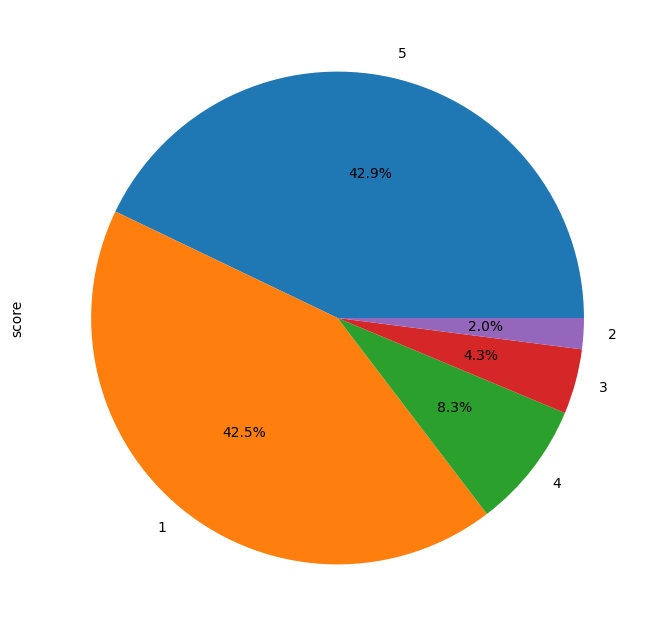

In [ ]:
# Visualize review scores as pie chart  
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

In [ ]:
# Create new dataframe with review content and score for further analysis
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [ ]:
# Display new dataframe header
df_reviews_content.head()

,content,score
0,I have paid the necessary fee and tried to reg...,1
1,Fraud app! I started with micro loan expecting...,1
2,I started with micro loans expecting decent re...,1
3,The app is in Beta mode since past 2 years mon...,1
4,Worst possible investment option. My money is ...,1


Install azure text analytics API

In [ ]:
pip install azure-ai-textanalytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.9/173.9 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.3 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [ ]:
# Define the service key and endpoint of Azure Text Analytics
key = "4f40f49470f34ce2b1758902d75c182c"
endpoint = "https://mycognitiveserviceresource12345.cognitiveservices.azure.com/"

In [ ]:
# Configure Azure Text Analytics client library
ta_credential = AzureKeyCredential(key)
text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint, 
        credential=ta_credential)
client = text_analytics_client

reviews_content_sentiment = []

# Pass review content to Azure Text Analytics and collect sentiment result
for index, headers in df_reviews_content.iterrows():
    reviews_content = str(headers['content'])
    print("Review Content: {}".format(reviews_content))
    documents = [reviews_content]
    response = client.analyze_sentiment(documents=documents, language="zh-hant")[0]
    sentiment = response.sentiment
    print("Review Content Sentiment: {}".format(sentiment))
    reviews_score = str(headers['score'])
    print("Review Content Score: {}".format(reviews_score))
    reviews_content_sentiment.append([reviews_content, sentiment, reviews_score])

# Convert collected news headers with sentiment to Pandas dataframes.
reviews_content_sentiment = pd.DataFrame(reviews_content_sentiment, columns=['content','sentiment','reviews_score'])

Review Content: I have paid the necessary fee and tried to register with your application but it is not working and on the dashboard it says "in processing, our team will soon be in touch with you" but to my surprise no one ever bothered to get in touch with me. If you are not in a position to help me out then I request you to kindly revert the charges 500/- paid by me back to my original source of payment and I will close the account and uninstall your app.
Review Content Sentiment: negative
Review Content Score: 1
Review Content: Fraud app! I started with micro loan expecting returns as advertised, I didn't even get my principal amount back. Lot of defaulters, and the loan gets marked as NPA. Customer service is non existent, they charge the fee from you but your money is not safe.
Review Content Sentiment: negative
Review Content Score: 1
Review Content: I started with micro loans expecting decent return, with thousnads. I didn't even get back my principal amount. There are lot of d

In [ ]:
# Count number of review content sentiment
reviews_content_sentiment['sentiment'].value_counts()

positive    247
negative    177
neutral      36
mixed        32
Name: sentiment, dtype: int64

<Axes: ylabel='content'>

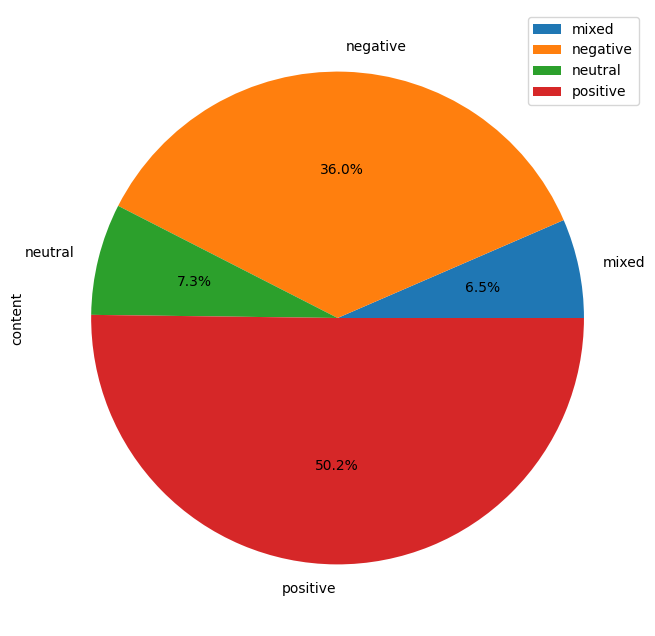

In [ ]:
# Visualize review content sentiment as pie chart.
reviews_content_sentiment.groupby(['sentiment']).count().plot(kind='pie', y='content', figsize=(8,8), autopct='%1.1f%%')

In [ ]:
# Group by sentiment & reviews_score
reviews_content_sentiment.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
mixed      1                 19
           2                  2
           4                  2
           5                  9
negative   1                155
           2                  6
           3                  8
           4                  6
           5                  2
neutral    1                 24
           3                  2
           4                  6
           5                  4
positive   1                 11
           2                  2
           3                 11
           4                 27
           5                196
Name: content, dtype: int64

<Axes: xlabel='sentiment'>

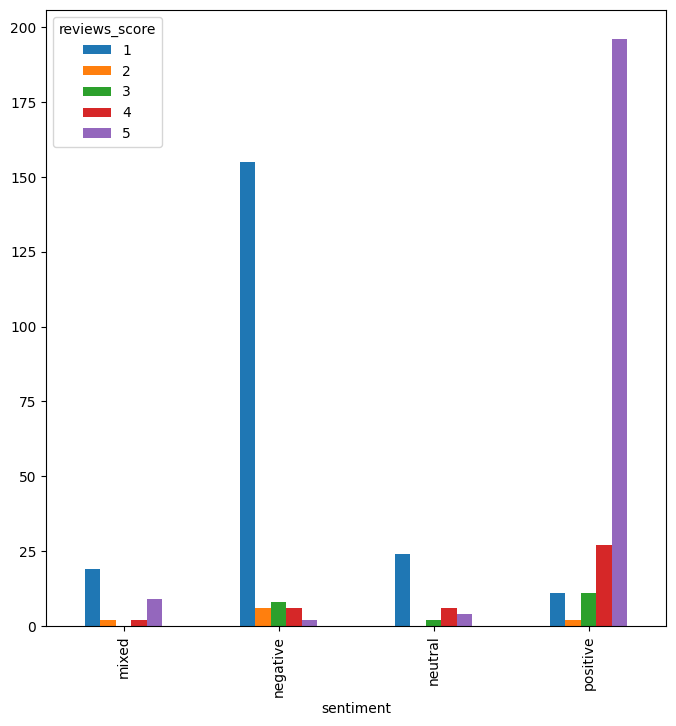

In [ ]:
# Visual sentiment & reviews_score as bar chart
pd.crosstab(reviews_content_sentiment['sentiment'],reviews_content_sentiment['reviews_score']).plot.bar(figsize=(8,8))

In [ ]:
# Check dataframe information
reviews_content_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        492 non-null    object
 1   sentiment      492 non-null    object
 2   reviews_score  492 non-null    object
dtypes: object(3)
memory usage: 11.7+ KB


In [ ]:
reviews_content_sentiment.to_csv('lendbox.csv')
reviews_content_sentiment.head()

,content,sentiment,reviews_score
0,I have paid the necessary fee and tried to reg...,negative,1
1,Fraud app! I started with micro loan expecting...,negative,1
2,I started with micro loans expecting decent re...,mixed,1
3,The app is in Beta mode since past 2 years mon...,negative,1
4,Worst possible investment option. My money is ...,negative,1


In [ ]:
# Create new dataframe to perform factorization
reviews_content_sentiment_factorized = reviews_content_sentiment.copy()

In [ ]:
# Perform factorization for sentiment column
reviews_content_sentiment_factorized.sentiment = pd.factorize(reviews_content_sentiment_factorized.sentiment)[0]

In [ ]:
# Convert reviews_score column data type to intager
reviews_content_sentiment_factorized['reviews_score'] = reviews_content_sentiment_factorized['reviews_score'].astype(int)

In [ ]:
# Check dataframe information
reviews_content_sentiment_factorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        492 non-null    object
 1   sentiment      492 non-null    int64 
 2   reviews_score  492 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 11.7+ KB


In [ ]:
# Group by sentiment (factorized) & reviews_score
reviews_content_sentiment_factorized.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
0          1                155
           2                  6
           3                  8
           4                  6
           5                  2
1          1                 19
           2                  2
           4                  2
           5                  9
2          1                 11
           2                  2
           3                 11
           4                 27
           5                196
3          1                 24
           3                  2
           4                  6
           5                  4
Name: content, dtype: int64

After factorization of sentiment column, below is numberic values the mapping.

0 = Neutral
1 = Negative
2 = Positive
3 = Mixed

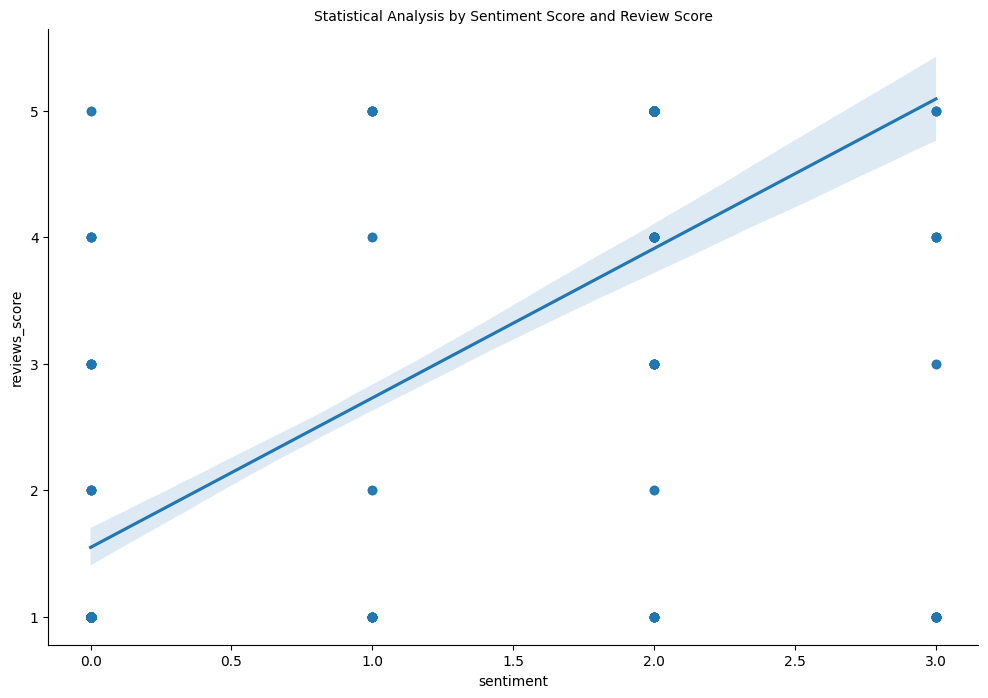

In [ ]:
# Plotting sentiment & reviews_score columns relationship by Seaborn.
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.title('Statistical Analysis by Sentiment Score and Review Score', fontsize=10)
sns.regplot(x='sentiment', y= 'reviews_score', data=reviews_content_sentiment_factorized)
sns.despine()

Data Analysis from Visualization

Positive sentiment (2) from review content is trending to higher reivew score.

Negative sentiment (1) from review content is trending to lower review score.

Neutral sentiment (0) from review content is trending to lower review score.

In other word, lower review score is trending to Neutral sentiment (0).

From this observation, if sentiment is negative to neutral, user would give lower review score.